# 의사결정나무를 시각화하는 4가지 방법

#### 출처: [Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python](https://mljar.com/blog/visualize-decision-tree/)

In [1]:
# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

## Iris data

In [2]:
# 데이터 load
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(x, y)

### 1) 텍스트로 표현

In [4]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [5]:
# 파일 저장
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### 2) plot_tree

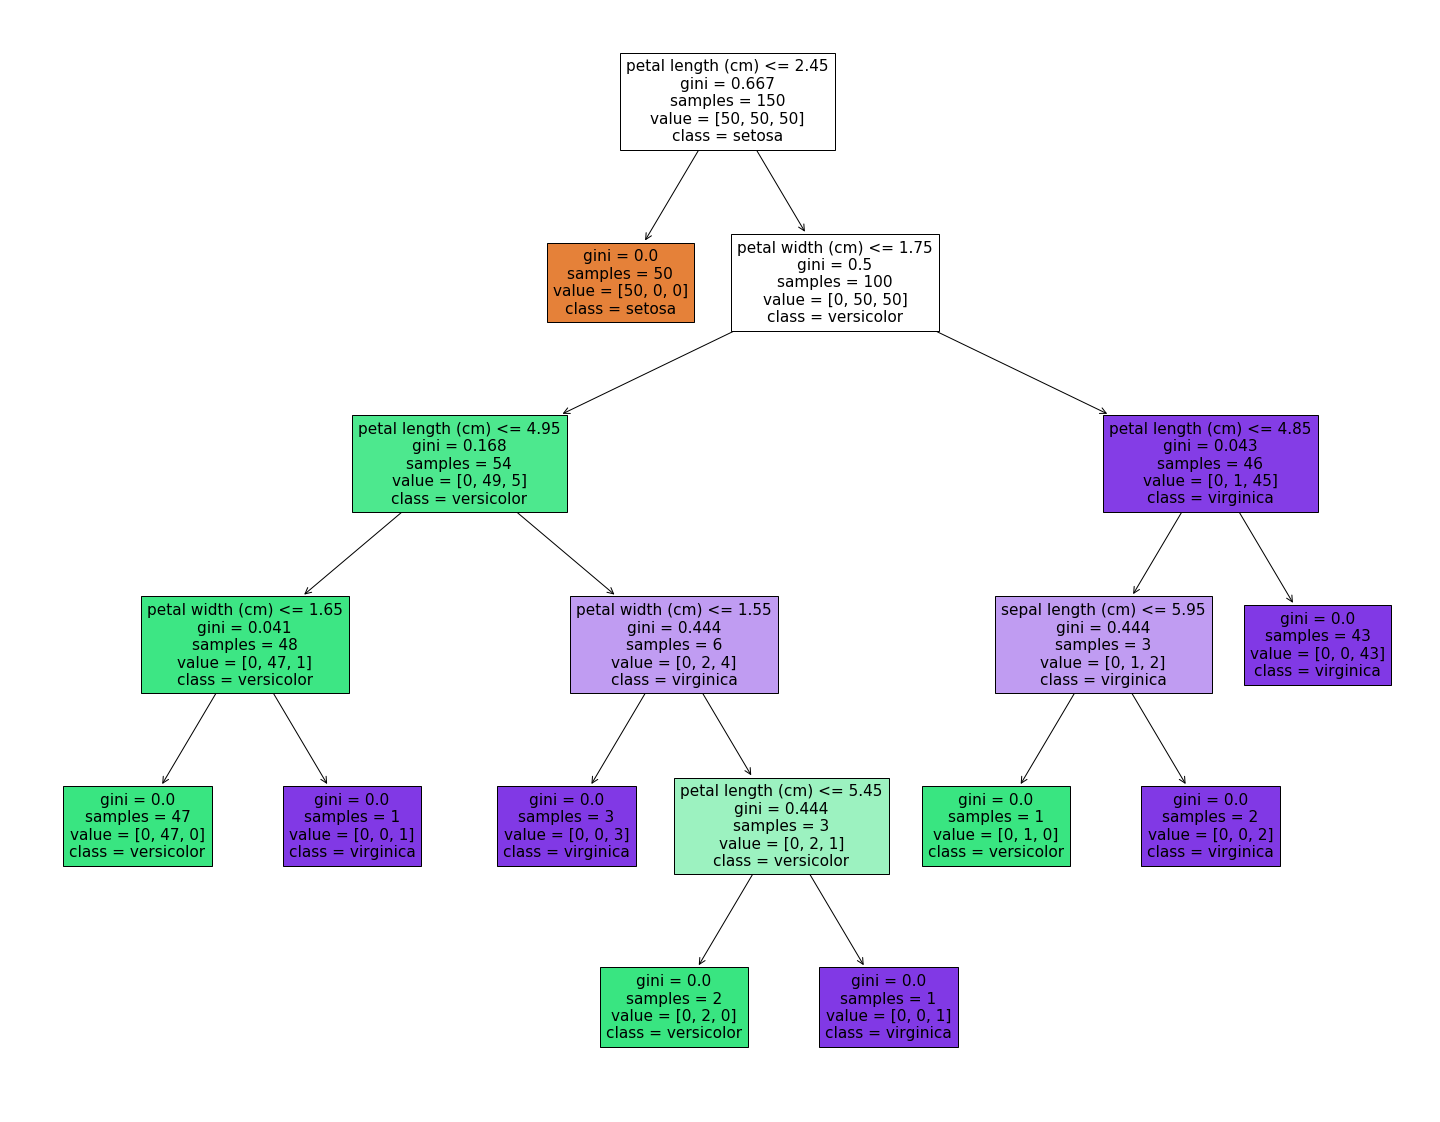

In [6]:
fig = plt.figure(figsize=(25,20))
show = tree.plot_tree(clf, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,
                      filled=True
)

In [7]:
# 파일 저장
fig.savefig("decistion_tree.png")

### 3) graphviz로 표현하기

In [8]:
import os
os.environ["PATH"]+=os.pathsep+'D:/Graphviz/bin/'

In [9]:
import graphviz

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True
)

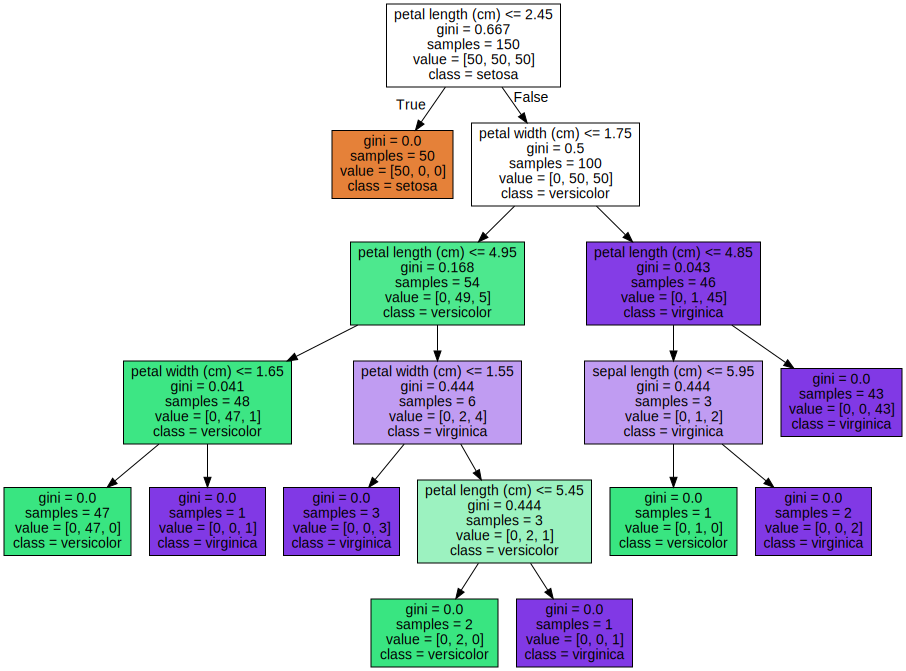

In [11]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [12]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### 4) dtreeviz

In [13]:
from dtreeviz.trees import dtreeviz

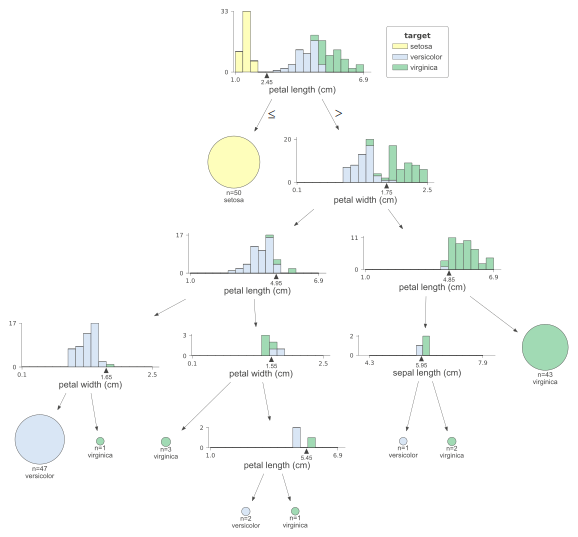

In [14]:
viz = dtreeviz(clf, x, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz

In [15]:
viz.save("decision_tree.svg")